/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(442368,)


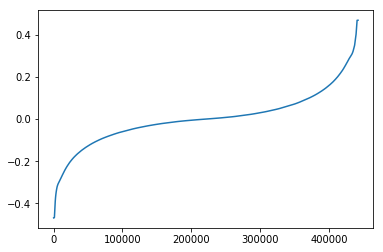

In [1]:
from tensorpack import tfutils
wei = tfutils.varmanip.load_chkpt_vars('/home/jovyan/harvard-heavy/xin/runs/2232_alex_warm_step1-1e2/model-450360')
wei.keys()

import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
%matplotlib inline

plt.plot(np.sort(wei['conv4/W'],axis=None))
pprint(np.sort(wei['conv4/W'],axis=None).shape)

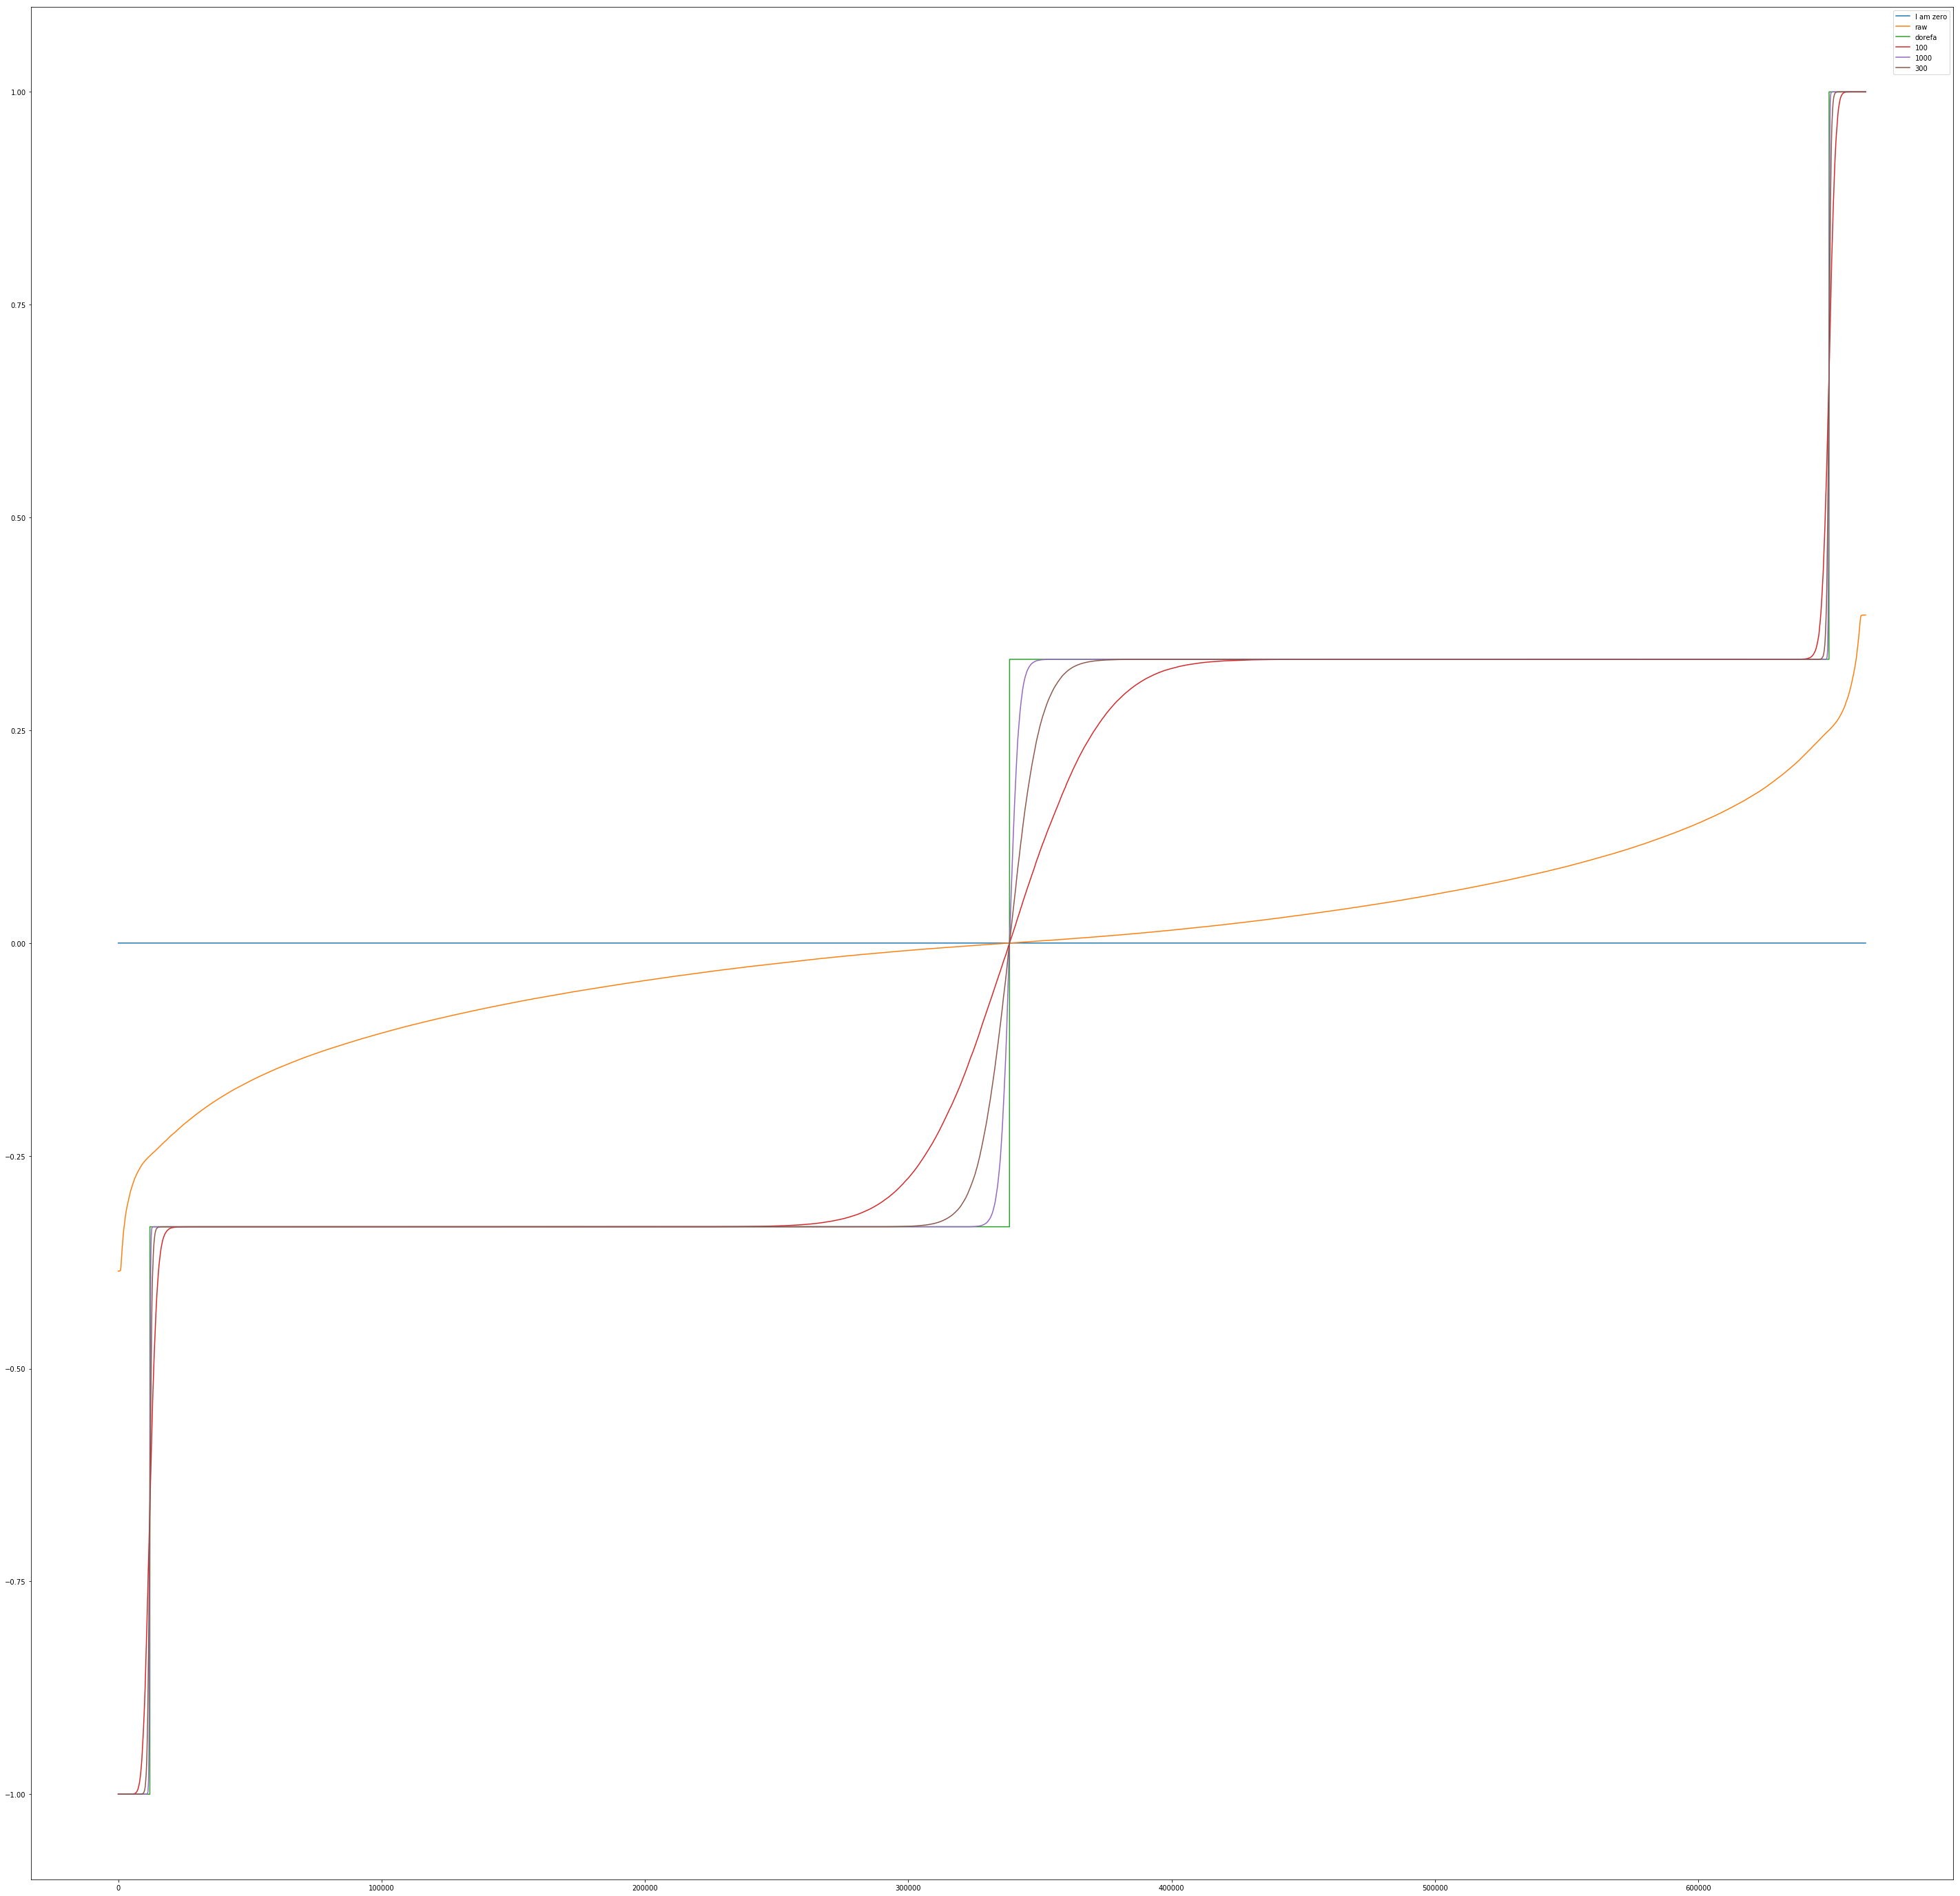

In [6]:
from dorefa import get_dorefa, get_warmbin
import tensorflow as tf
fw, fa, fg = get_dorefa(2, 2, 32)
wei_after = fw(np.sort(wei['conv3/W'],axis=None),0)
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session(config=config)

plt.figure(figsize=(50,50))
plt.plot(np.zeros_like(np.sort(wei['conv3/W'],axis=None)), label='I am zero')
plt.plot(np.sort(wei['conv3/W'],axis=None), label='raw')
plt.plot(sess.run(wei_after),label='dorefa')



fw_warm, _, _ = get_warmbin(2, 2, 32)
wei_after_soft = fw_warm(np.sort(wei['conv3/W'],axis=None),100)

plt.plot(sess.run(wei_after_soft),label='100')


fw_warm, _, _ = get_warmbin(2, 2, 32)
wei_after_soft = fw_warm(np.sort(wei['conv3/W'],axis=None),1000)

plt.plot(sess.run(wei_after_soft),label='1000')

fw_warm, _, _ = get_warmbin(2, 2, 32)
wei_after_soft = fw_warm(np.sort(wei['conv3/W'],axis=None),300)

plt.plot(sess.run(wei_after_soft),label='300')
plt.legend()